In [2]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df_final_demo = pd.read_csv('/Users/Jaimecalderon/Desktop/IRONHACK/Proyectos/Proyecto 2/CSV/df_final_demo.txt')

In [4]:
df_final_demo.shape

(70609, 9)

In [5]:
df_final_demo.isna().sum()


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [6]:
df_final_demo.dropna(inplace=True)
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [7]:
df_final_demo.rename(columns = {'client_id':'Client ID', 'clnt_tenure_yr':'Client tenure year', 'clnt_tenure_mnth':'Client tenure month', 'clnt_age':'Age', 'gendr':'Gender', 'num_accts':'Number of accounts', 'bal': 'Balance', 'calls_6_mnth':'Calls 6 months', 'logons_6_mnth': 'Log-ons 6 months'}, inplace=True)

In [8]:
df_final_demo.reset_index(drop=True,inplace=True)

In [9]:
df_final_demo['Age'] = df_final_demo['Age'].astype(int)
df_final_demo

,Client ID,Client tenure year,Client tenure month,Age,Gender,Number of accounts,Balance,Calls 6 months,Log-ons 6 months
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70589,7993686,4.0,56.0,38,U,3.0,1411062.68,5.0,5.0
70590,8981690,12.0,148.0,31,M,2.0,101867.07,6.0,6.0
70591,333913,16.0,198.0,61,F,2.0,40745.00,3.0,3.0
70592,1573142,21.0,255.0,68,M,3.0,475114.69,4.0,4.0


In [10]:
df_final_demo['Gender'] = df_final_demo['Gender'].replace('X','U')

In [11]:
df_final_demo['Client tenure year'] = df_final_demo['Client tenure year'].astype(int)

In [12]:
df_final_demo['Client tenure month'] = df_final_demo['Client tenure month'].astype(int)

In [12]:
df_final_demo

,Client ID,Client tenure year,Client tenure month,Age,Gender,Number of accounts,Balance,Calls 6 months,Log-ons 6 months
0,836976,6,73,60,U,2.0,45105.30,6.0,9.0
1,2304905,7,94,58,U,2.0,110860.30,6.0,9.0
2,1439522,5,64,32,U,2.0,52467.79,6.0,9.0
3,1562045,16,198,49,M,2.0,67454.65,3.0,6.0
4,5126305,12,145,33,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70589,7993686,4,56,38,U,3.0,1411062.68,5.0,5.0
70590,8981690,12,148,31,M,2.0,101867.07,6.0,6.0
70591,333913,16,198,61,F,2.0,40745.00,3.0,3.0
70592,1573142,21,255,68,M,3.0,475114.69,4.0,4.0


In [13]:
df_final_demo['Number of accounts'] = df_final_demo['Number of accounts'].astype(int)

In [14]:
df_final_demo['Calls 6 months'] = df_final_demo['Calls 6 months'].astype(int)

In [15]:
df_final_demo['Log-ons 6 months'] = df_final_demo['Log-ons 6 months'].astype(int)

In [16]:
df_final_demo

,Client ID,Client tenure year,Client tenure month,Age,Gender,Number of accounts,Balance,Calls 6 months,Log-ons 6 months
0,836976,6,73,60,U,2,45105.30,6,9
1,2304905,7,94,58,U,2,110860.30,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70589,7993686,4,56,38,U,3,1411062.68,5,5
70590,8981690,12,148,31,M,2,101867.07,6,6
70591,333913,16,198,61,F,2,40745.00,3,3
70592,1573142,21,255,68,M,3,475114.69,4,4


In [20]:
df_final_demo['Age'].unique()

array([60, 58, 32, 49, 33, 30, 57, 67, 54, 34, 51, 62, 36, 74, 31, 25, 42,
       55, 38, 68, 52, 63, 48, 66, 65, 46, 23, 26, 56, 76, 27, 39, 40, 43,
       35, 19, 64, 22, 61, 72, 44, 28, 59, 45, 18, 78, 50, 29, 37, 70, 53,
       69, 71, 83, 21, 47, 73, 41, 20, 75, 24, 79, 80, 87, 86, 85, 17, 82,
       77, 88, 96, 81, 84, 94, 89, 92, 91, 95, 90, 93, 15, 16, 14, 13])

In [16]:
def grupo_edad(age):
        if age < 18:
            return 'Teen'
        elif age > 60:
            return 'Senior'
        else:
            return 'Adult'
    
df_final_demo['Age Group'] = df_final_demo['Age'].apply(grupo_edad)

In [18]:
df_final_demo

,Client ID,Client tenure year,Client tenure month,Age,Gender,Number of accounts,Balance,Calls 6 months,Log-ons 6 months,Age Group
0,836976,6,73,60,U,2,45105.30,6,9,Adult
1,2304905,7,94,58,U,2,110860.30,6,9,Adult
2,1439522,5,64,32,U,2,52467.79,6,9,Adult
3,1562045,16,198,49,M,2,67454.65,3,6,Adult
4,5126305,12,145,33,F,2,103671.75,0,3,Adult
...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4,56,38,U,3,1411062.68,5,5,Adult
70590,8981690,12,148,31,M,2,101867.07,6,6,Adult
70591,333913,16,198,61,F,2,40745.00,3,3,Senior
70592,1573142,21,255,68,M,3,475114.69,4,4,Senior


In [23]:
df_final_demo.describe(include='object')

,Gender,Age Group
count,70594,70594
unique,3,3
top,U,Adult
freq,24125,55500


In [24]:
df_final_demo.describe(include='number')

,Client ID,Client tenure year,Client tenure month,Age,Number of accounts,Balance,Calls 6 months,Log-ons 6 months
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.180426,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.600390,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.000000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.000000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [25]:
df_final_demo

,Client ID,Client tenure year,Client tenure month,Age,Gender,Number of accounts,Balance,Calls 6 months,Log-ons 6 months,Age Group
0,836976,6,73,60,U,2,45105.30,6,9,Adult
1,2304905,7,94,58,U,2,110860.30,6,9,Adult
2,1439522,5,64,32,U,2,52467.79,6,9,Adult
3,1562045,16,198,49,M,2,67454.65,3,6,Adult
4,5126305,12,145,33,F,2,103671.75,0,3,Adult
...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4,56,38,U,3,1411062.68,5,5,Adult
70590,8981690,12,148,31,M,2,101867.07,6,6,Adult
70591,333913,16,198,61,F,2,40745.00,3,3,Senior
70592,1573142,21,255,68,M,3,475114.69,4,4,Senior


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/1457914650.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_counts, x='Age Group', y='Count', palette="Set3")


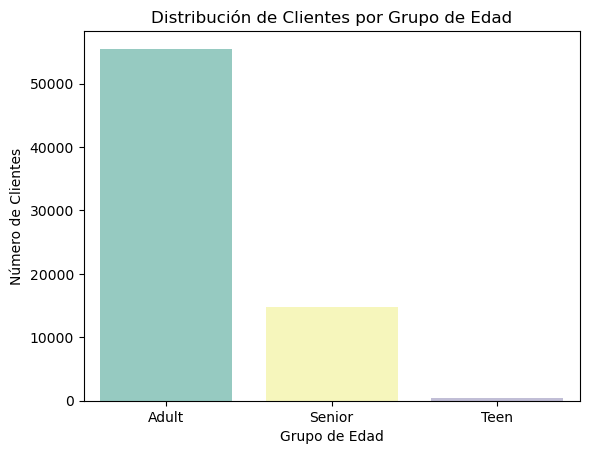

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar los valores en la columna 'Age Group'
age_group_counts = df_final_demo['Age Group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']

# Crear el gráfico de barras
sns.barplot(data=age_group_counts, x='Age Group', y='Count', palette="Set3")
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Grupo de Edad')
plt.show()


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/3834931226.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Gender_counts, x='Gender', y='Count', palette="Set3")


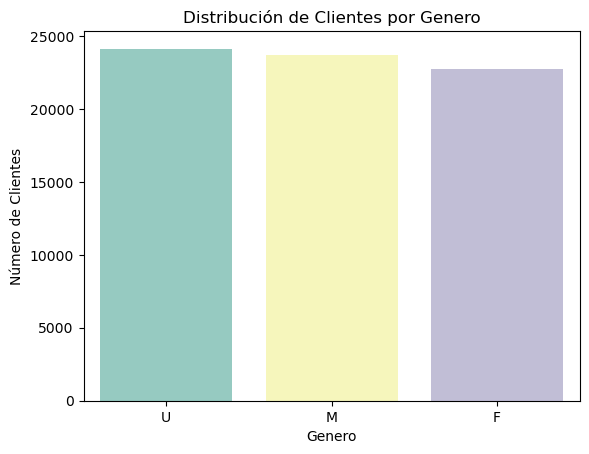

In [27]:
Gender_counts = df_final_demo['Gender'].value_counts().reset_index()
Gender_counts.columns = ['Gender', 'Count']

# Crear el gráfico de barras
sns.barplot(data=Gender_counts, x='Gender', y='Count', palette="Set3")
plt.xlabel('Genero')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Genero')
plt.show()

In [28]:
df_final_demo['Gender'].value_counts()

Gender
U    24125
M    23724
F    22745
Name: count, dtype: int64

In [29]:
df_final_demo

,Client ID,Client tenure year,Client tenure month,Age,Gender,Number of accounts,Balance,Calls 6 months,Log-ons 6 months,Age Group
0,836976,6,73,60,U,2,45105.30,6,9,Adult
1,2304905,7,94,58,U,2,110860.30,6,9,Adult
2,1439522,5,64,32,U,2,52467.79,6,9,Adult
3,1562045,16,198,49,M,2,67454.65,3,6,Adult
4,5126305,12,145,33,F,2,103671.75,0,3,Adult
...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4,56,38,U,3,1411062.68,5,5,Adult
70590,8981690,12,148,31,M,2,101867.07,6,6,Adult
70591,333913,16,198,61,F,2,40745.00,3,3,Senior
70592,1573142,21,255,68,M,3,475114.69,4,4,Senior


In [30]:
Gender_counts

,Gender,Count
0,U,24125
1,M,23724
2,F,22745


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/1094825147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_demo, x='Gender', y='Balance', palette="Set3")


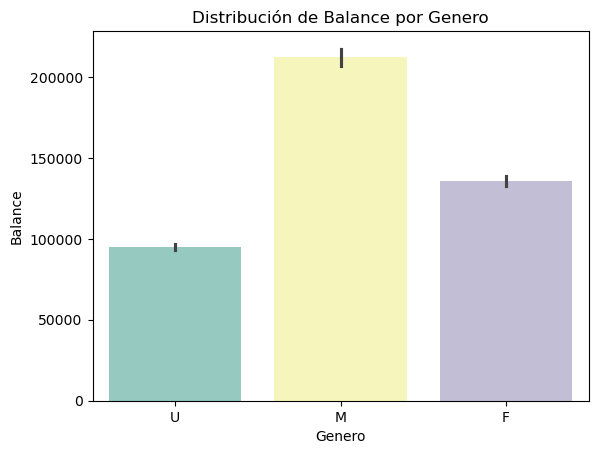

In [31]:
# Crear el gráfico de barras
sns.barplot(data=df_final_demo, x='Gender', y='Balance', palette="Set3")
plt.xlabel('Genero')
plt.ylabel('Balance')
plt.title('Distribución de Balance por Genero')
plt.show()

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/3638446935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_demo, x='Gender', y='Client tenure year', palette="Set3")


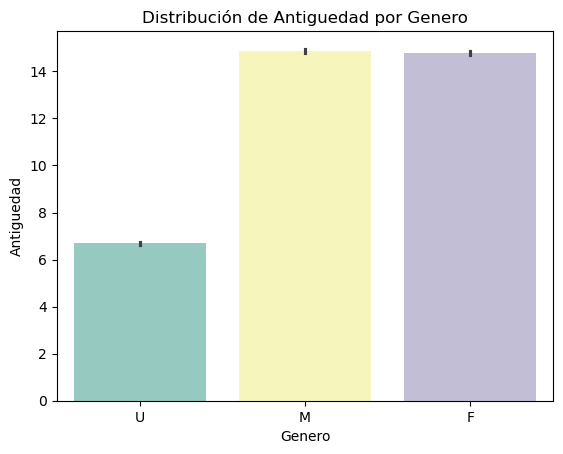

In [32]:
# Crear el gráfico de barras
sns.barplot(data=df_final_demo, x='Gender', y='Client tenure year', palette="Set3")
plt.xlabel('Genero')
plt.ylabel('Antiguedad')
plt.title('Distribución de Antiguedad por Genero')
plt.show()

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/2116886694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_demo, x='Gender', y='Log-ons 6 months', palette="Set3")


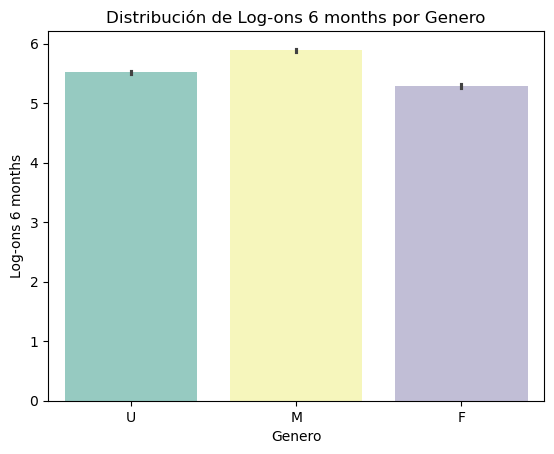

In [33]:
# Crear el gráfico de barras
sns.barplot(data=df_final_demo, x='Gender', y='Log-ons 6 months', palette="Set3")
plt.xlabel('Genero')
plt.ylabel('Log-ons 6 months')
plt.title('Distribución de Log-ons 6 months por Genero')
plt.show()

In [34]:
df_final_demo['Client tenure year'].unique()

array([ 6,  7,  5, 16, 12, 30, 15,  8,  4,  3, 10, 11, 13, 14, 19, 18, 25,
       23, 21, 17,  9, 27, 24, 20, 28, 22, 29, 46, 26, 32, 33, 35,  2, 38,
       31, 48, 34, 36, 51, 47, 49, 37, 39, 40, 55, 42, 44, 43, 50, 54, 41,
       45, 52, 62])

In [17]:
def antiguedad(ant):
        if ant <= 10:
            return 'New'
        if ant >= 11 and  ant < 20:
            return 'Noob'
        if ant >= 20 and ant < 30:
             return 'Young'
        if ant >= 30 and ant < 40:
             return 'Experimented'
        if ant >= 40 and ant < 50:
             return 'Senior'
        else:
            return 'Lifetime'
    
df_final_demo['Tenure Groups'] = df_final_demo['Client tenure year'].apply(antiguedad)

In [18]:
df_final_demo

,Client ID,Client tenure year,Client tenure month,Age,Gender,Number of accounts,Balance,Calls 6 months,Log-ons 6 months,Age Group,Tenure Groups
0,836976,6,73,60,U,2,45105.30,6,9,Adult,New
1,2304905,7,94,58,U,2,110860.30,6,9,Adult,New
2,1439522,5,64,32,U,2,52467.79,6,9,Adult,New
3,1562045,16,198,49,M,2,67454.65,3,6,Adult,Noob
4,5126305,12,145,33,F,2,103671.75,0,3,Adult,Noob
...,...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4,56,38,U,3,1411062.68,5,5,Adult,New
70590,8981690,12,148,31,M,2,101867.07,6,6,Adult,Noob
70591,333913,16,198,61,F,2,40745.00,3,3,Senior,Noob
70592,1573142,21,255,68,M,3,475114.69,4,4,Senior,Young


In [37]:
df_final_demo['Tenure Groups'].unique()

array(['New', 'Noob', 'Experimented', 'Young', 'Senior', 'Lifetime'],
      dtype=object)

### Q antiguedad tienen los clientes q mas llaman

In [63]:
df_final_demo

,Client ID,Client tenure year,Client tenure month,Age,Gender,Number of accounts,Balance,Calls 6 months,Log-ons 6 months,Age Group,Tenure Groups
0,836976,6,73,60,U,2,45105.30,6,9,Adult,New
1,2304905,7,94,58,U,2,110860.30,6,9,Adult,New
2,1439522,5,64,32,U,2,52467.79,6,9,Adult,New
3,1562045,16,198,49,M,2,67454.65,3,6,Adult,Noob
4,5126305,12,145,33,F,2,103671.75,0,3,Adult,Noob
...,...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4,56,38,U,3,1411062.68,5,5,Adult,New
70590,8981690,12,148,31,M,2,101867.07,6,6,Adult,Noob
70591,333913,16,198,61,F,2,40745.00,3,3,Senior,Noob
70592,1573142,21,255,68,M,3,475114.69,4,4,Senior,Young


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/195127437.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_demo, x='Tenure Groups', y='Calls 6 months', palette="Set3")


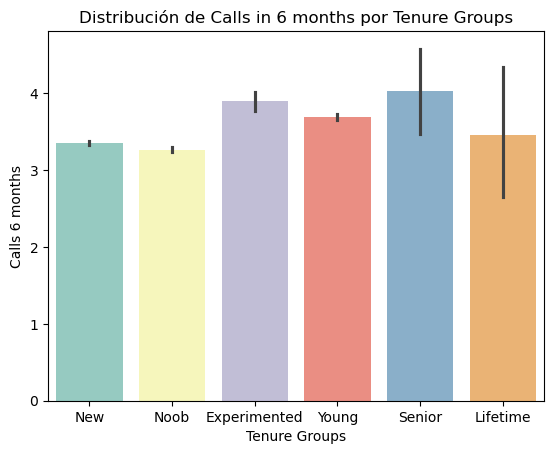

In [38]:
sns.barplot(data=df_final_demo, x='Tenure Groups', y='Calls 6 months', palette="Set3")
plt.xlabel('Tenure Groups')
plt.ylabel('Calls 6 months')
plt.title('Distribución de Calls in 6 months por Tenure Groups')
plt.show()

### Q genero tiene mas cuentas abiertas
 

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/3427308964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_demo, x='Gender', y='Number of accounts', palette="Set3")


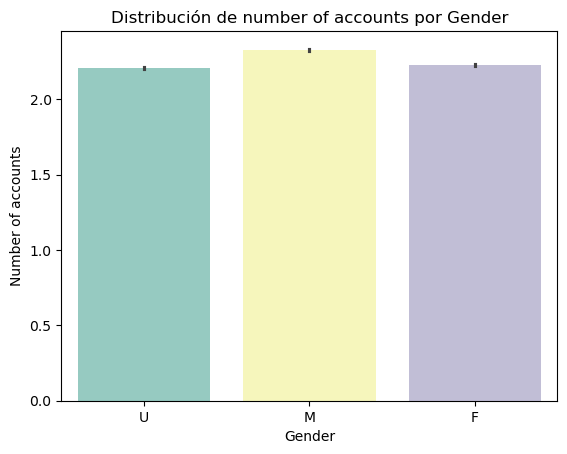

In [39]:
sns.barplot(data=df_final_demo, x='Gender', y='Number of accounts', palette="Set3")
plt.xlabel('Gender')
plt.ylabel('Number of accounts')
plt.title('Distribución de number of accounts por Gender')
plt.show()

### Q grupo de edad consulta mas la cuenta.

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/4114684922.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_demo, x='Tenure Groups', y='Log-ons 6 months', palette="Set3")


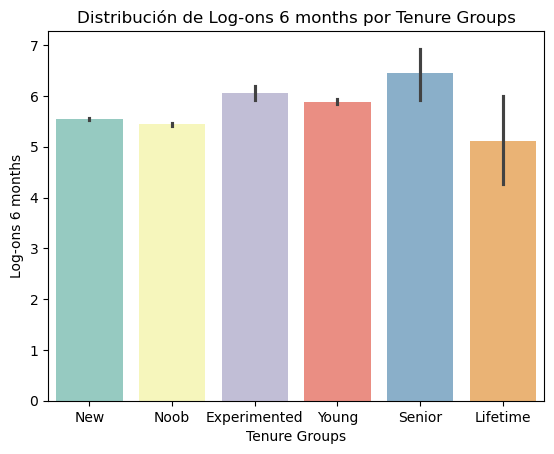

In [40]:
sns.barplot(data=df_final_demo, x='Tenure Groups', y='Log-ons 6 months', palette="Set3")
plt.xlabel('Tenure Groups')
plt.ylabel('Log-ons 6 months')
plt.title('Distribución de Log-ons 6 months por Tenure Groups')
plt.show()

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/2813422972.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_demo, x='Number of accounts', y='Balance', palette="Set3")


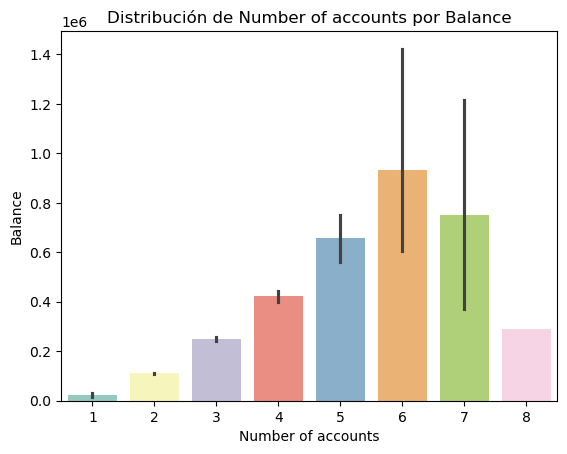

In [41]:
sns.barplot(data=df_final_demo, x='Number of accounts', y='Balance', palette="Set3")
plt.xlabel('Number of accounts')
plt.ylabel('Balance')
plt.title('Distribución de Number of accounts por Balance')
plt.show()

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/575934869.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_demo, x='Tenure Groups', y='Balance', palette="Set3")


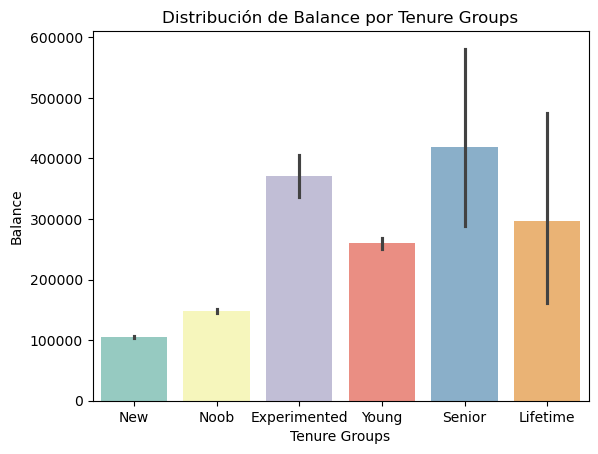

In [42]:
sns.barplot(data=df_final_demo, x='Tenure Groups', y='Balance', palette="Set3")
plt.xlabel('Tenure Groups')
plt.ylabel('Balance')
plt.title('Distribución de Balance por Tenure Groups')
plt.show()

# Distribución de Balance por Log-ons 6 months

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_7229/956288747.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_demo, x='Log-ons 6 months', y='Balance', palette="Set3")


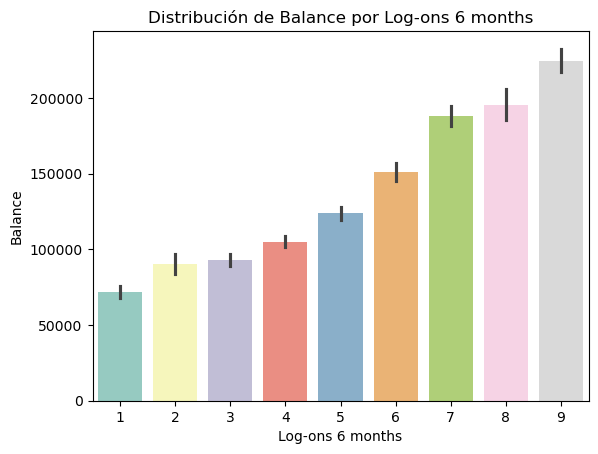

In [62]:
sns.barplot(data=df_final_demo, x='Log-ons 6 months', y='Balance', palette="Set3")
plt.xlabel('Log-ons 6 months')
plt.ylabel('Balance')
plt.title('Distribución de Balance por Log-ons 6 months')
plt.show()

In [24]:
df_final_demo['Balance']=df_final_demo['Balance'].astype(int)

In [25]:
df_final_demo.dtypes

Client ID               int64
Client tenure year      int64
Client tenure month     int64
Age                     int64
Gender                 object
Number of accounts      int64
Balance                 int64
Calls 6 months          int64
Log-ons 6 months        int64
Age Group              object
Tenure Groups          object
dtype: object

In [26]:
df_final_demo.to_csv('df_final_demo2.csv')

In [45]:
df_final_exp_clients = pd.read_csv('/Users/Jaimecalderon/Desktop/IRONHACK/Proyectos/Proyecto 2/CSV/df_final_experiment_clients.txt')

In [46]:
df_final_exp_clients.isna().sum()
df_final_exp_clients.dropna(inplace=True)
df_final_exp_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [47]:
df_final_exp_clients.rename(columns = {'client_id': 'Client ID'}, inplace = True)

In [48]:
df_final_exp_clients['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [49]:
df_pq = pd.merge(df_final_demo, df_final_exp_clients,on='Client ID',  how= 'inner')

In [50]:
df_pq

,Client ID,Client tenure year,Client tenure month,Age,Gender,Number of accounts,Balance,Calls 6 months,Log-ons 6 months,Age Group,Tenure Groups,Variation
0,836976,6,73,60,U,2,45105.30,6,9,Adult,New,Test
1,2304905,7,94,58,U,2,110860.30,6,9,Adult,New,Control
2,1439522,5,64,32,U,2,52467.79,6,9,Adult,New,Test
3,1562045,16,198,49,M,2,67454.65,3,6,Adult,Noob,Test
4,5126305,12,145,33,F,2,103671.75,0,3,Adult,Noob,Control
...,...,...,...,...,...,...,...,...,...,...,...,...
50482,1780858,21,262,68,M,3,372100.59,6,9,Senior,Young,Test
50483,6967120,21,260,68,M,3,4279873.38,6,9,Senior,Young,Control
50484,5826160,20,249,56,F,2,44837.16,2,5,Adult,Young,Test
50485,8739285,19,229,69,F,2,44994.24,1,4,Senior,Noob,Test


In [51]:
df_pq.isna().sum()

Client ID              0
Client tenure year     0
Client tenure month    0
Age                    0
Gender                 0
Number of accounts     0
Balance                0
Calls 6 months         0
Log-ons 6 months       0
Age Group              0
Tenure Groups          0
Variation              0
dtype: int64

In [52]:
df_pq['Variation'].value_counts()

Variation
Test       26961
Control    23526
Name: count, dtype: int64

## Genero por Variation Group

In [53]:
# Contar los géneros en la columna 'variation' para el grupo 'test'
test_variation_counts = df_pq[df_pq['Variation'] == 'Test']['Gender'].value_counts()

# Contar los géneros en la columna 'variation' para el grupo 'control'
control_variation_counts = df_pq[df_pq['Variation'] == 'Control']['Gender'].value_counts()

print("Variations in test group:")
print(test_variation_counts)

print("\nVariations in control group:")
print(control_variation_counts)

Variations in test group:
Gender
U    9268
M    8977
F    8716
Name: count, dtype: int64

Variations in control group:
Gender
U    8014
M    7970
F    7542
Name: count, dtype: int64


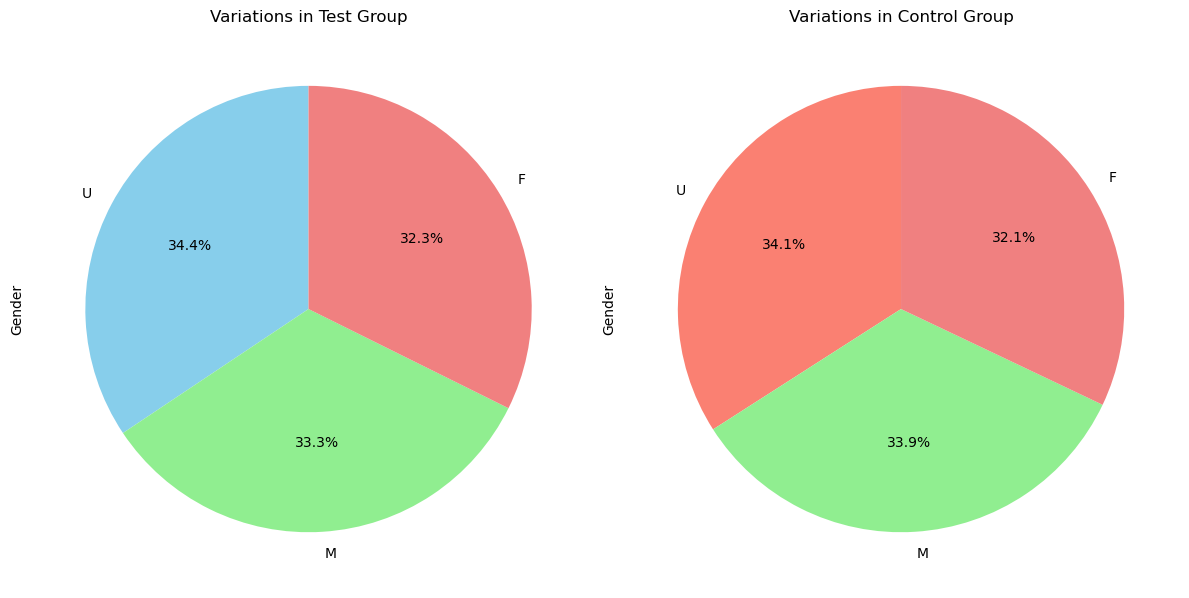

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Graficar las variaciones para el grupo 'test' en un gráfico de pastel
test_variation_counts.plot(kind='pie', ax=ax[0], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'], subplots=True)
ax[0].set_title('Variations in Test Group')
ax[0].set_ylabel('Gender')

# Graficar las variaciones para el grupo 'control' en un gráfico de pastel
control_variation_counts.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightgreen', 'lightcoral'], subplots=True)
ax[1].set_title('Variations in Control Group')
ax[1].set_ylabel('Gender')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [55]:
test_variation_counts = pd.DataFrame(test_variation_counts)

In [56]:
test_variation_counts

,count
Gender,
U,9268
M,8977
F,8716


# Age Group

In [57]:
# Contar los géneros en la columna 'variation' para el grupo 'test'
test_age = df_pq[df_pq['Variation'] == 'Test']['Age Group'].value_counts()

# Contar los géneros en la columna 'variation' para el grupo 'control'
control_age = df_pq[df_pq['Variation'] == 'Control']['Age Group'].value_counts()

print("Variations in test group:")
print(test_age)

print("\nVariations in control group:")
print(control_age)

Variations in test group:
Age Group
Adult     20899
Senior     6028
Teen         34
Name: count, dtype: int64

Variations in control group:
Age Group
Adult     18074
Senior     5424
Teen         28
Name: count, dtype: int64


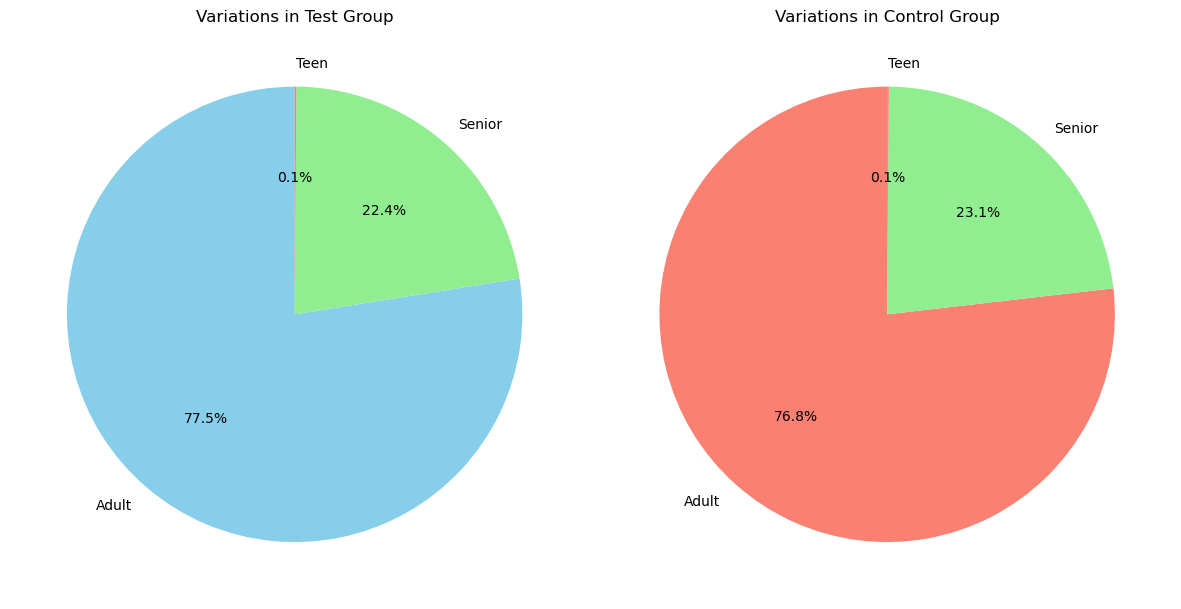

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Graficar las variaciones para el grupo 'test' en un gráfico de pastel
test_age.plot(kind='pie', ax=ax[0], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
ax[0].set_title('Variations in Test Group')
ax[0].set_ylabel('')

# Graficar las variaciones para el grupo 'control' en un gráfico de pastel
control_age.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightgreen', 'lightcoral'])
ax[1].set_title('Variations in Control Group')
ax[1].set_ylabel('')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


# Variation por Tenure Groups

In [59]:
# Contar los géneros en la columna 'variation' para el grupo 'test'
test_tenure = df_pq[df_pq['Variation'] == 'Test']['Tenure Groups'].value_counts()

# Contar los géneros en la columna 'variation' para el grupo 'control'
control_tenure = df_pq[df_pq['Variation'] == 'Control']['Tenure Groups'].value_counts()

print("Variations in test group:")
print(test_tenure)

print("\nVariations in control group:")
print(control_tenure)

Variations in test group:
Tenure Groups
New             13310
Noob             9393
Young            3764
Experimented      459
Senior             27
Lifetime            8
Name: count, dtype: int64

Variations in control group:
Tenure Groups
New             11394
Noob             8313
Young            3381
Experimented      414
Senior             18
Lifetime            6
Name: count, dtype: int64


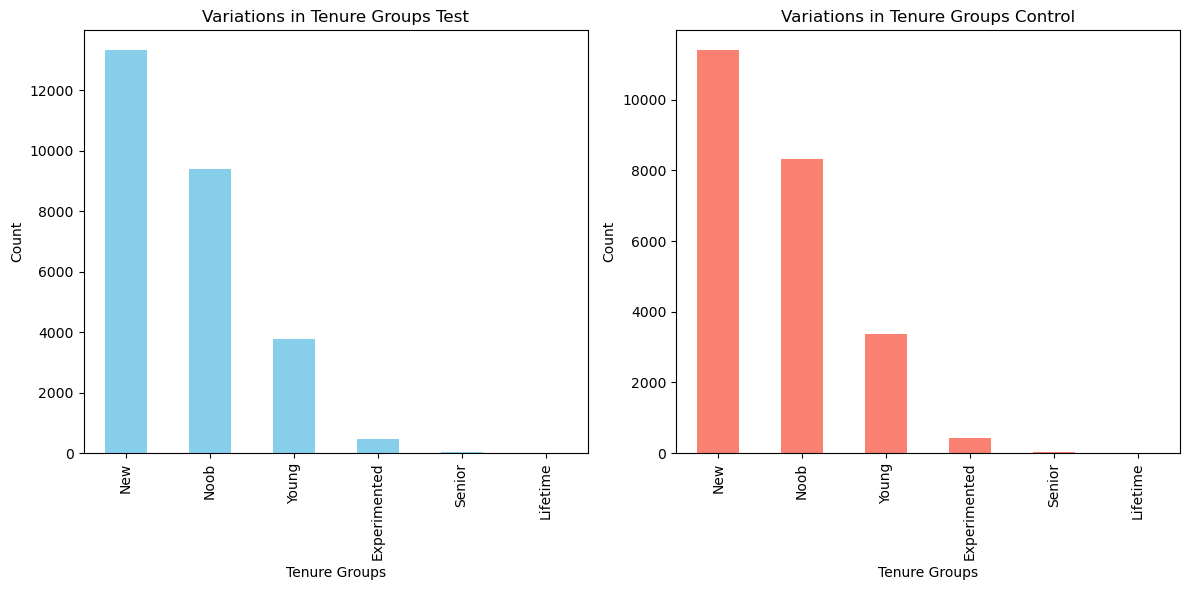

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Graficar las variaciones para el grupo 'test'
test_tenure.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Variations in Tenure Groups Test')
ax[0].set_xlabel('Tenure Groups')
ax[0].set_ylabel('Count')

# Graficar las variaciones para el grupo 'control'
control_tenure.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Variations in Tenure Groups Control')
ax[1].set_xlabel('Tenure Groups')
ax[1].set_ylabel('Count')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [61]:
df_pq

,Client ID,Client tenure year,Client tenure month,Age,Gender,Number of accounts,Balance,Calls 6 months,Log-ons 6 months,Age Group,Tenure Groups,Variation
0,836976,6,73,60,U,2,45105.30,6,9,Adult,New,Test
1,2304905,7,94,58,U,2,110860.30,6,9,Adult,New,Control
2,1439522,5,64,32,U,2,52467.79,6,9,Adult,New,Test
3,1562045,16,198,49,M,2,67454.65,3,6,Adult,Noob,Test
4,5126305,12,145,33,F,2,103671.75,0,3,Adult,Noob,Control
...,...,...,...,...,...,...,...,...,...,...,...,...
50482,1780858,21,262,68,M,3,372100.59,6,9,Senior,Young,Test
50483,6967120,21,260,68,M,3,4279873.38,6,9,Senior,Young,Control
50484,5826160,20,249,56,F,2,44837.16,2,5,Adult,Young,Test
50485,8739285,19,229,69,F,2,44994.24,1,4,Senior,Noob,Test
